# Class balancing study

## Common Parameters

In [53]:
sys.path.append("..") # Adds higher directory to python modules path.
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import *
from helpers import *
from visuals import *
from data.data import *

import pandas as pd
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score
from visuals import plot_confusion_matrix
from tensorflow.keras import utils
from keras_numpy_backend import categorical_crossentropy

%load_ext autoreload
%autoreload 2
%matplotlib inline

history_folder = 'history'

model_name = 'DenseNet201'
postfix = 'best_balanced_acc'

# How to handle SVG fonts
plt.rcParams['svg.fonttype'] = 'none'

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 20264, False)
baseline_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "pred_folder": os.path.join("..", 'test_predict_results', model_name, hyperparameter_str, "no_unknown"),
    "data_folder": "../data/isic2019/sampled_original"
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 21000, True)
class_balanced_21000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "pred_folder": os.path.join("..", 'test_predict_results', model_name, hyperparameter_str, "no_unknown"),
    "data_folder": "../data/isic2019/sampled_balanced_21000"
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 21000, False)
class_unbalanced_21000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "pred_folder": os.path.join("..", 'test_predict_results', model_name, hyperparameter_str, "no_unknown"),
    "data_folder": "../data/isic2019/sampled_unbalanced_21000"
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 30000, True)
class_balanced_30000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "pred_folder": os.path.join("..", 'test_predict_results', model_name, hyperparameter_str, "no_unknown"),
    "data_folder": "../data/isic2019/sampled_balanced_30000"
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 30000, False)
class_unbalanced_30000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "pred_folder": os.path.join("..", 'test_predict_results', model_name, hyperparameter_str, "no_unknown"),
    "data_folder": "../data/isic2019/sampled_unbalanced_30000"
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 40000, True)
class_balanced_40000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "pred_folder": os.path.join("..", 'test_predict_results', model_name, hyperparameter_str, "no_unknown"),
    "data_folder": "../data/isic2019/sampled_balanced_40000"
} 

hyperparameter_str = formated_hyperparameter_str(6, 0.001, 0.00001, None, 0.3, 16, 40000, False)
class_unbalanced_40000_model = {
    "log": os.path.join("..", history_folder, model_name, hyperparameter_str, "training.csv"),
    "hyperparameters": get_hyperparameters_from_str(hyperparameter_str), 
    "pred_folder": os.path.join("..", 'test_predict_results', model_name, hyperparameter_str, "no_unknown"),
    "data_folder": "../data/isic2019/sampled_unbalanced_40000"
} 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DenseNet201:
* Feature extract epochs: 6.
* Start learning rate: 0.001000
* Fine tuning learning rate: 0.000010
* Dropout rate: 0.300000
* Lambda(l2): None
* Batch size: 16

## Data Augmentation Methods:
* Random Rotations.
* Random Flips
* Random Shears
* Random Brightness variations
* Random Saturation variations

## Impact of the number of samples on validation accuracy (balanced datasets)

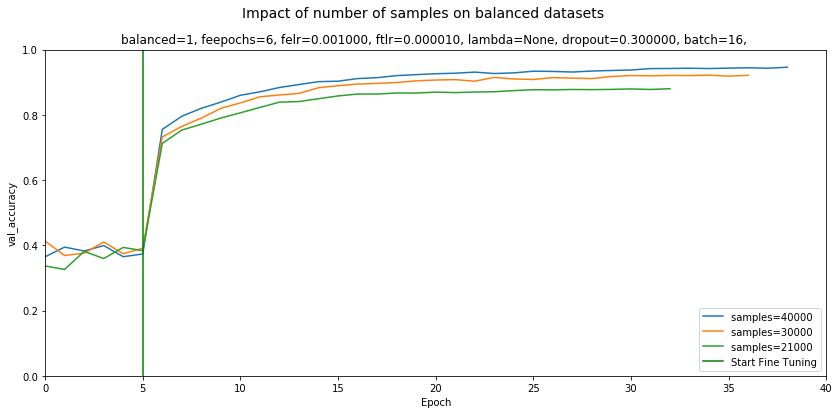

In [58]:
fig = plot_hyperparameter_comparisson_metric(
    [class_balanced_40000_model]+[class_balanced_30000_model]+[class_balanced_21000_model],
    "val_accuracy",
    0,
    1.0,
    hyperparameters_compared=["samples"],
    constant_parameters={
        "balanced": 1,
        "feepochs": 6, 
        "felr": 0.001,
        "ftlr": 0.00001,
        "dropout": 0.3, 
        "batch": 16,
        "lambda": None
    },
    title="Impact of number of samples on balanced datasets",
    feature_extract_epochs=6,
    epoch_max=40
)

## Compute test metrics for baseline (no oversampling or undersampling)

Training data has 20264 samples.


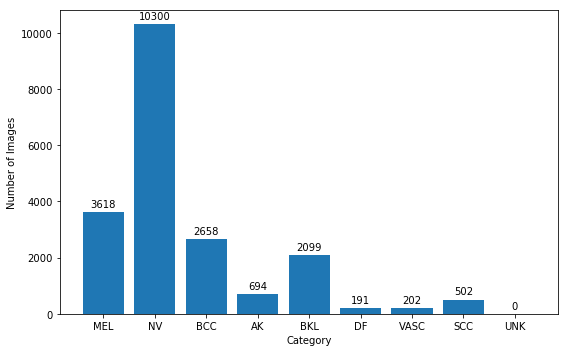

Test data has 5067 samples.


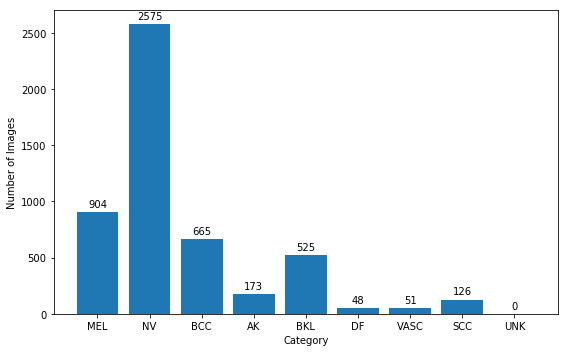

accuracy:  0.7975133214920072
balanced_accuracy_score:  0.6463479002366409
macro recall_score:  0.6463479002366409


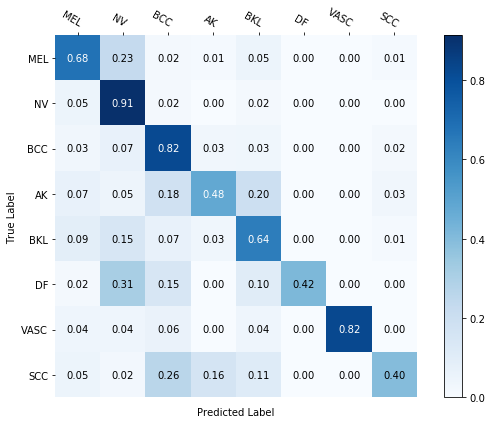

In [55]:
all_category_names, count_per_category, df_ground_truth = get_count_per_category(baseline_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_ground_truth_test = get_count_per_category(baseline_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    baseline_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

# 21000 training samples

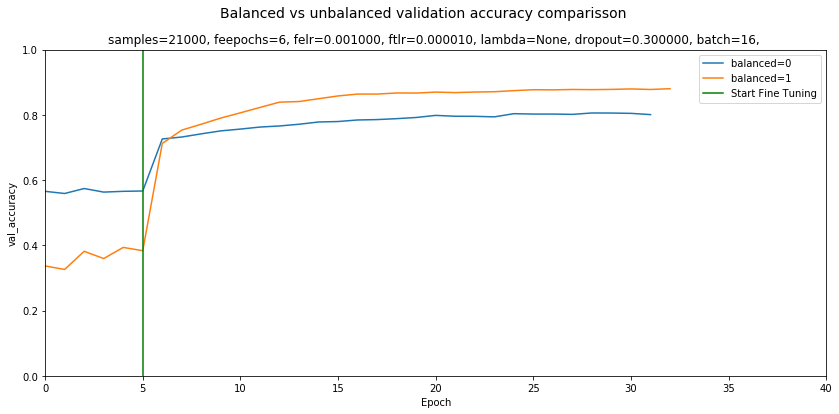

In [32]:
fig = plot_hyperparameter_comparisson_metric(
    [class_unbalanced_21000_model]+[class_balanced_21000_model],
    "val_accuracy",
    0,
    1.0,
    hyperparameters_compared=["balanced"],
    constant_parameters={
        "samples": 21000,
        "feepochs": 6, 
        "felr": 0.001,
        "ftlr": 0.00001,
        "dropout": 0.3, 
        "batch": 16,
        "lambda": None
    },
    title="Balanced vs unbalanced validation accuracy comparisson",
    feature_extract_epochs=6,
    epoch_max=40
)

## Compute test metrics for class unbalanced dataset (21000 training samples)

Training data has 20997 samples.


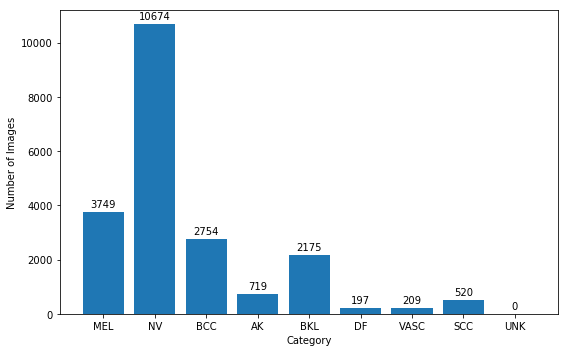

Test data has 5067 samples.


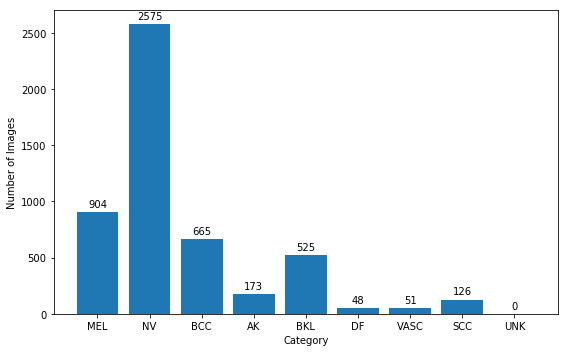

accuracy:  0.762589928057554
balanced_accuracy_score:  0.666018208421153
macro recall_score:  0.666018208421153


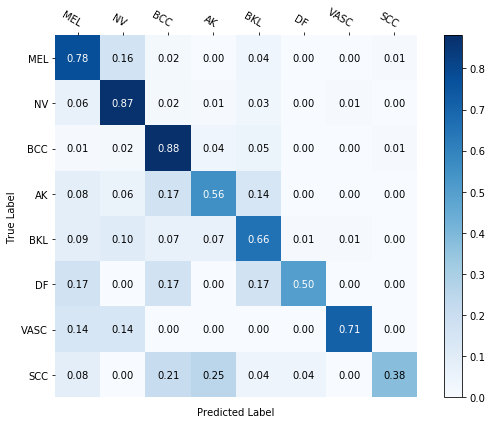

In [87]:
all_category_names, count_per_category = get_count_per_category(class_unbalanced_21000_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category = get_count_per_category(class_unbalanced_21000_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_unbalanced_21000_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

## Compute test metrics for class balanced dataset (21000 training samples)

Training data has 21000 samples.


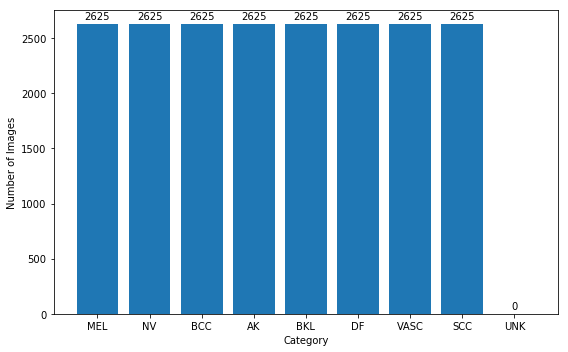

Test data has 5067 samples.


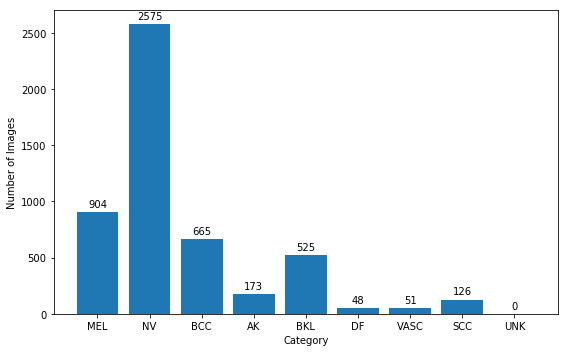

accuracy:  0.7519242155121374
balanced_accuracy_score:  0.7447264955391679
macro recall_score:  0.7447264955391679


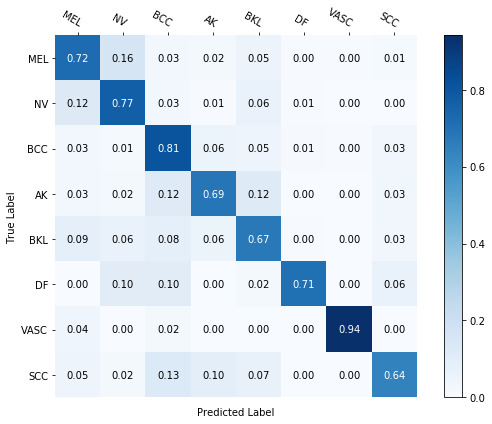

In [8]:
all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_21000_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_21000_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_balanced_21000_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

# 30000 training samples

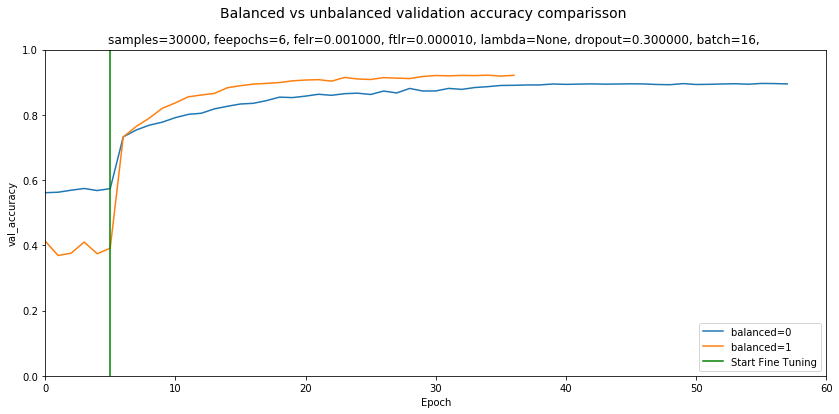

In [22]:
fig = plot_hyperparameter_comparisson_metric(
    [class_unbalanced_30000_model]+[class_balanced_30000_model],
    "val_accuracy",
    0,
    1.0,
    hyperparameters_compared=["balanced"],
    constant_parameters={
        "samples": 30000,
        "feepochs": 6, 
        "felr": 0.001,
        "ftlr": 0.00001,
        "dropout": 0.3, 
        "batch": 16,
        "lambda": None
    },
    title="Balanced vs unbalanced validation accuracy comparisson",
    feature_extract_epochs=6,
    epoch_max=60
)

## Test metrics for class unbalanced dataset 

Training data has 29997 samples.


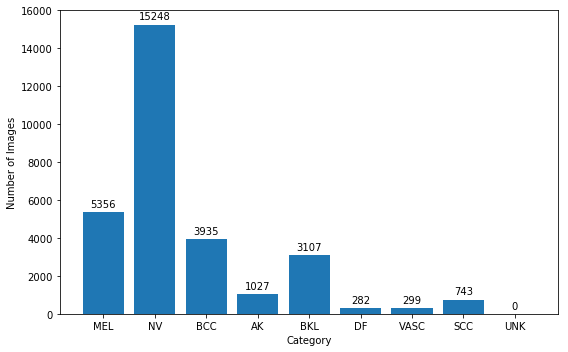

Test data has 5067 samples.


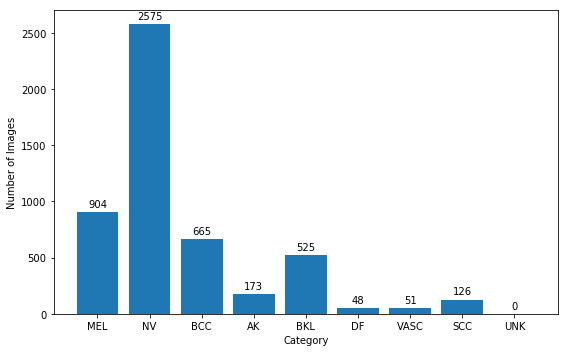

accuracy:  0.8221827511347938
balanced_accuracy_score:  0.6993335103540623
macro recall_score:  0.6993335103540623


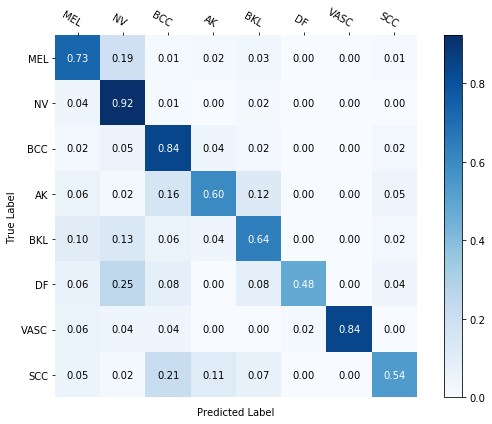

In [6]:
all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_unbalanced_30000_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_unbalanced_30000_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_unbalanced_30000_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

## Test metrics for class balanced dataset 

Training data has 30000 samples.


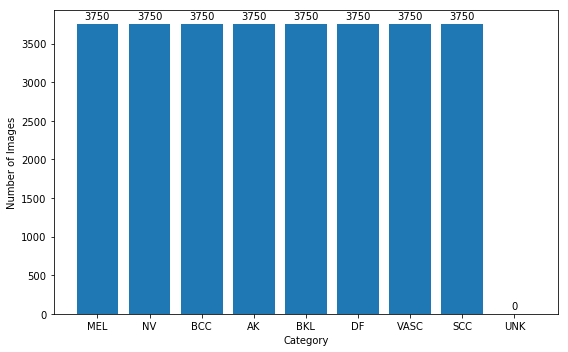

Test data has 5067 samples.


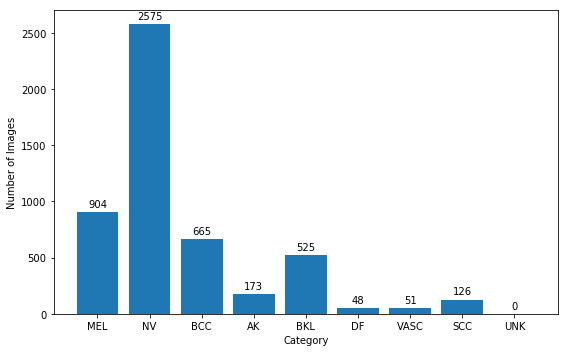

accuracy:  0.7795539767120584
balanced_accuracy_score:  0.7655637363246468
macro recall_score:  0.7655637363246468


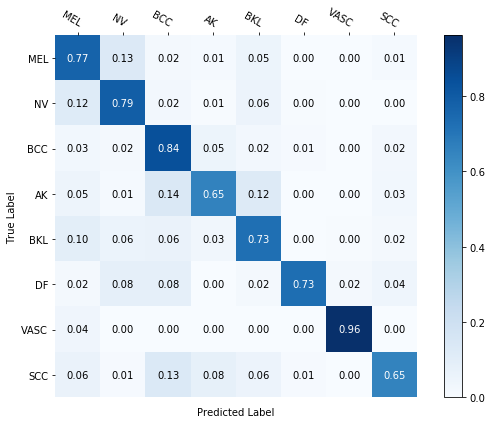

In [5]:
all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_30000_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_30000_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_balanced_30000_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

# 40000 Balanced Samples

Training data has 40000 samples.


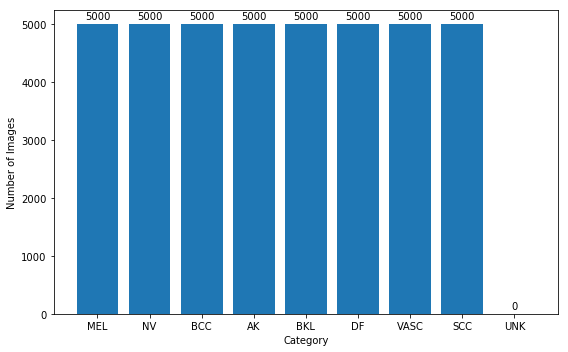

Test data has 5067 samples.


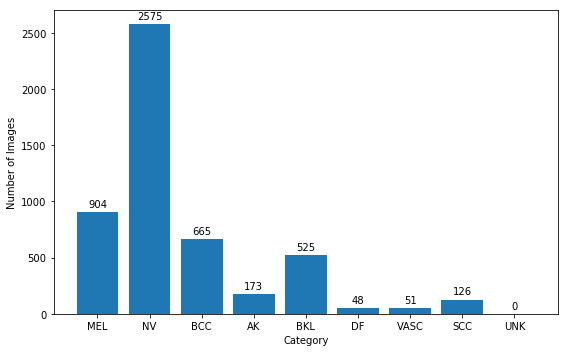

accuracy:  0.8026445628577067
balanced_accuracy_score:  0.7849143504154792
macro recall_score:  0.7849143504154792


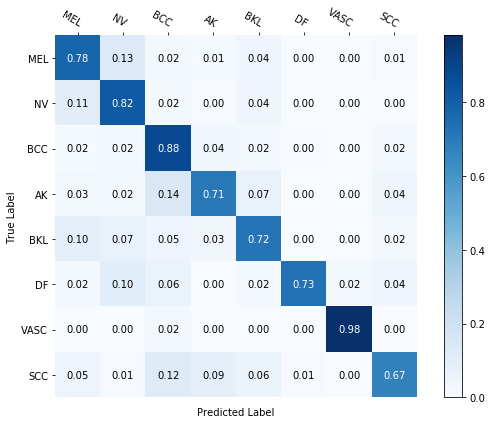

In [44]:
all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_40000_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_40000_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_balanced_40000_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()

# 82400 Balanced Samples

In [ ]:
all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_82400_model["data_folder"])
total_sample_count = sum(count_per_category.values())
print("Training data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

all_category_names, count_per_category, df_test_ground_truth = get_count_per_category(class_balanced_82400_model["data_folder"], test=True)
total_sample_count = sum(count_per_category.values())
print("Test data has {} samples.".format(total_sample_count))

plot_class_dist(all_category_names, count_per_category).tight_layout()
plt.show()

# Load predicted results
file_path = os.path.join(
    class_balanced_82400_model["pred_folder"], 
    "{}.csv".format(postfix)
)

df_pred = pd.read_csv(file_path)
df = pd.merge(df_pred, df_test_ground_truth, on='image')
y_true = df['category']
y_pred = df['pred_category']

# Compute Balanced Accuracy
print('accuracy: ', accuracy_score(y_true, y_pred))
print('balanced_accuracy_score: ', balanced_accuracy_score(y_true, y_pred))
print('macro recall_score: ', recall_score(y_true, y_pred, average='macro'))
# Confusion Matrix
plot_confusion_matrix(
    y_true, 
    y_pred, 
    all_category_names, 
    normalize=True,
    figsize=(8, 6)
)
plt.show()